### Similaridade de vozes - Disfarces

Em resultado.csv temos a comparação entre os embeddings gerados pelo deep speaker para cada trecho de áudio disponível no dataset. A comparação é por similaridade de cosseno.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('resultado.csv')

df.head()

,voz-1,classe-1,voz-2,classe-2,score
0,GH7,DISFARCE,GH7,DISFARCE,1.000000
1,GH7,DISFARCE,GH7,DISFARCE,0.614986
2,GH7,DISFARCE,GH7,DISFARCE,0.747182
3,GH7,DISFARCE,GH7,DISFARCE,0.735326
4,GH7,DISFARCE,GH7,DISFARCE,0.610291


#### Removendo os scores da comparação entre um arquivo de áudio com ele mesmo, o score dá 1

In [2]:
print(df.shape)
df = df.drop(df[df['score']>0.99].index)
print(df.shape)
df.head()

(203841, 5)
(203193, 5)


,voz-1,classe-1,voz-2,classe-2,score
1,GH7,DISFARCE,GH7,DISFARCE,0.614986
2,GH7,DISFARCE,GH7,DISFARCE,0.747182
3,GH7,DISFARCE,GH7,DISFARCE,0.735326
4,GH7,DISFARCE,GH7,DISFARCE,0.610291
5,GH7,DISFARCE,GH7,DISFARCE,0.616554


#### Cada combinação voz-classe tem de 2 a 8 trechos de áudio de aproximadamente 8 segundos
#### Uso a média dos scores desses trechos como métrica para os experimentos

In [3]:
#médias entre uma voz e classe com as demais
df_medias = df.groupby(['voz-1', 'classe-1', 'voz-2', 'classe-2']).mean()

# comparação de uma voz com ela mesma
print(df_medias.loc['GH1', :, 'GH1',:])

#comparação de uma voz de um homem com uma de outro homem 
print(df_medias.loc['GH1', :, 'GH2', :])
print(df_medias.loc['GH2', :, 'GH1', :])

#mais uma, agora homem e rapaz
print(df_medias.loc['GH1', :, 'GR1', :])
print(df_medias.loc['GR1', :, 'GH1', :])

                                  score
voz-1 classe-1 voz-2 classe-2          
GH1   DISFARCE GH1   DISFARCE  0.746833
                     NORMAL    0.624282
      NORMAL   GH1   NORMAL    0.687960
                                  score
voz-1 classe-1 voz-2 classe-2          
GH1   DISFARCE GH2   NORMAL    0.546969
      NORMAL   GH2   NORMAL    0.560694
                                  score
voz-1 classe-1 voz-2 classe-2          
GH2   DISFARCE GH1   DISFARCE  0.564198
                     NORMAL    0.524883
                                  score
voz-1 classe-1 voz-2 classe-2          
GH1   DISFARCE GR1   DISFARCE  0.480518
                     NORMAL    0.506974
      NORMAL   GR1   NORMAL    0.552463
                                  score
voz-1 classe-1 voz-2 classe-2          
GR1   DISFARCE GH1   NORMAL    0.493377


In [4]:
#sumário para mesma voz
df[df['voz-1'] == df['voz-2']]['score'].describe()

count    4169.000000
mean        0.667319
std         0.113398
min         0.177960
25%         0.603195
50%         0.687062
75%         0.748153
max         0.953725
Name: score, dtype: float64

In [5]:
#sumário para vozes diferentes
df[df['voz-1'] != df['voz-2']]['score'].describe()

count    199024.000000
mean          0.366731
std           0.144214
min          -0.241430
25%           0.265812
50%           0.366823
75%           0.470230
max           0.854398
Name: score, dtype: float64

In [6]:
#sumário para mesma voz, mesma classe(normal ou disfarçado)
df[(df['voz-1'] == df['voz-2']) & (df['classe-1'] == df['classe-2'])]['score'].describe()

count    2033.000000
mean        0.700238
std         0.103581
min         0.206756
25%         0.654287
50%         0.721117
75%         0.769749
max         0.908317
Name: score, dtype: float64

In [7]:
#sumário para mesma voz, classes diferentes (normal ou disfarçado)
df[(df['voz-1'] == df['voz-2']) & (df['classe-1'] != df['classe-2'])]['score'].describe()

count    2136.000000
mean        0.635988
std         0.113483
min         0.177960
25%         0.567853
50%         0.652163
75%         0.718801
max         0.953725
Name: score, dtype: float64

In [8]:
#sumário para vozez diferentes, mesma classe(normal ou disfarçado)
df[(df['voz-1'] != df['voz-2']) & (df['classe-1'] == df['classe-2'])]['score'].describe()

count    99572.000000
mean         0.368777
std          0.144728
min         -0.217313
25%          0.267510
50%          0.369501
75%          0.472547
max          0.828025
Name: score, dtype: float64

In [9]:
#sumário para vozes diferentes, classes diferentes (normal ou disfarçado)
df[(df['voz-1'] != df['voz-2']) & (df['classe-1'] != df['classe-2'])]['score'].describe()

count    99452.000000
mean         0.364682
std          0.143670
min         -0.241430
25%          0.264362
50%          0.364314
75%          0.467882
max          0.854398
Name: score, dtype: float64

In [10]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

#métricas para um corte de 0.7
df['predito'] = np.where(df['score'] > 0.7,1,0)
df['y'] = np.where(df['voz-1'] == df['voz-2'], 1, 0)
print('f1 score: ', f1_score(df['y'], df['predito']))
print('precision: ', precision_score(df['y'], df['predito']))
print('recall: ', recall_score(df['y'], df['predito']))
print('acurácia: ', accuracy_score(df['y'], df['predito']))

    
#np.where(df['predito'] == df['y'], 1, 0)

f1 score:  0.5282648337775284
precision:  0.6361486486486486
recall:  0.45166706644279203
acurácia:  0.9834492329952311


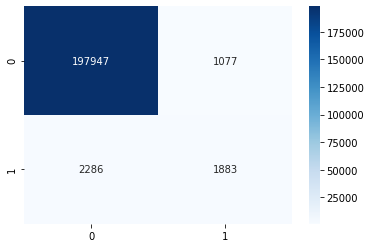

In [11]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(df['y'], df['predito'])
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

In [24]:
df_same_voice = df[(df['voz-1'] == df['voz-2'])]
print(df_same_voice.shape)

print(df_same_voice['voz-1'].drop_duplicates())

(4169, 7)
1          GH7
4446       GH8
8842       GR6
14422      GH2
18097      GH1
22941      GG3
26532      GR1
30676      GH3
34189      GG8
38242      GM5
42814      GM4
45639      GH5
49552      GR2
52867      GG9
53964      GM3
57231      GR8
60997      GG1
64186      GM1
68902      GG5
72001     GH10
74556      GM6
78592      GR4
81082      GG6
84037     GG10
86956      GM2
92686      GM7
95497     GR10
98731      GG4
101464     GH9
104607     GH6
107262     GM8
109447    GM10
111607     GH4
114589     GM9
117106     GG2
119997     GR9
122436     GR3
124839     GR5
127206     GG7
130689     GR7
200014     GC1
200916    GC10
201496     GC9
201951     GC3
202302     GC5
202666     GC6
202981     GC4
203247     GC7
203436     GC8
203566     GC2
Name: voz-1, dtype: object


In [25]:
df_different_voice_same_group = df[(df['voz-1'] != df['voz-2']) & ((df['voz-1'].str[:2] == df['voz-2'].str[:2]))]
print(df_different_voice_same_group.head(50))
print(df_different_voice_same_group.shape)

    voz-1  classe-1 voz-2  classe-2     score  predito  y
7     GH7  DISFARCE   GH8  DISFARCE  0.311546        0  0
8     GH7  DISFARCE   GH8  DISFARCE  0.322883        0  0
9     GH7  DISFARCE   GH8  DISFARCE  0.293944        0  0
10    GH7  DISFARCE   GH8  DISFARCE  0.318813        0  0
11    GH7  DISFARCE   GH8  DISFARCE  0.340338        0  0
12    GH7  DISFARCE   GH8  DISFARCE  0.181777        0  0
13    GH7  DISFARCE   GH8  DISFARCE  0.281583        0  0
23    GH7  DISFARCE   GH2  DISFARCE  0.614539        0  0
24    GH7  DISFARCE   GH2  DISFARCE  0.588184        0  0
25    GH7  DISFARCE   GH2  DISFARCE  0.662540        0  0
26    GH7  DISFARCE   GH2  DISFARCE  0.494744        0  0
27    GH7  DISFARCE   GH2  DISFARCE  0.552373        0  0
28    GH7  DISFARCE   GH2  DISFARCE  0.625148        0  0
29    GH7  DISFARCE   GH1  DISFARCE  0.468787        0  0
30    GH7  DISFARCE   GH1  DISFARCE  0.433096        0  0
31    GH7  DISFARCE   GH1  DISFARCE  0.633104        0  0
32    GH7  DIS

In [23]:
#métricas para um corte de 0.7
df_novo = pd.concat([df_same_voice, df_different_voice_same_group])
df_novo['predito'] = np.where(df_novo['score'] > 0.7,1,0)
df_novo['y'] = np.where(df_novo['voz-1'] == df_novo['voz-2'], 1, 0)
print('f1 score: ', f1_score(df_novo['y'], df_novo['predito']))
print('precision: ', precision_score(df_novo['y'], df_novo['predito']))
print('recall: ', recall_score(df_novo['y'], df_novo['predito']))
print('acurácia: ', accuracy_score(df_novo['y'], df_novo['predito']))

f1 score:  0.5781393920786
precision:  0.8029850746268656
recall:  0.45166706644279203
acurácia:  0.9337719615356808


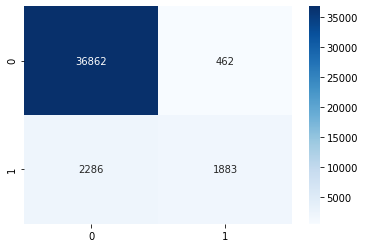

In [20]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(df_novo['y'], df_novo['predito'])

sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

In [35]:
df_novo = pd.concat([df_same_voice, df_different_voice_same_group])
df_novo = df_novo.drop(['predito'], axis=1)
df_novo = df_novo.groupby(['voz-1','classe-1', 'voz-2', 'classe-2'], as_index=False).mean()

In [57]:
#métricas para um corte de 0.7
df_novo['predito'] = np.where(df_novo['score'] > 0.62,1,0)
df_novo['y'] = np.where(df_novo['voz-1'] == df_novo['voz-2'], 1, 0)
print('f1 score: ', f1_score(df_novo['y'], df_novo['predito']))
print('precision: ', precision_score(df_novo['y'], df_novo['predito']))
print('recall: ', recall_score(df_novo['y'], df_novo['predito']))
print('acurácia: ', accuracy_score(df_novo['y'], df_novo['predito']))

f1 score:  0.8623188405797101
precision:  0.85
recall:  0.875
acurácia:  0.9594017094017094


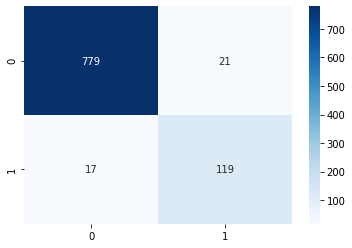

In [58]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(df_novo['y'], df_novo['predito'])

sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

In [49]:
df_novo[df_novo['y'] != df_novo['predito']]

,voz-1,classe-1,voz-2,classe-2,score,y,predito
102,GG1,DISFARCE,GG6,DISFARCE,0.638948,0,1
103,GG1,DISFARCE,GG6,NORMAL,0.637487,0,1
126,GG10,NORMAL,GG6,NORMAL,0.661986,0,1
131,GG2,DISFARCE,GG2,DISFARCE,0.614978,1,0
132,GG2,DISFARCE,GG2,NORMAL,0.532746,1,0
182,GG4,DISFARCE,GG6,NORMAL,0.629277,0,1
191,GG4,NORMAL,GG6,NORMAL,0.635717,0,1
195,GG5,DISFARCE,GG10,DISFARCE,0.623119,0,1
196,GG5,DISFARCE,GG10,NORMAL,0.637012,0,1
200,GG5,DISFARCE,GG4,DISFARCE,0.634625,0,1


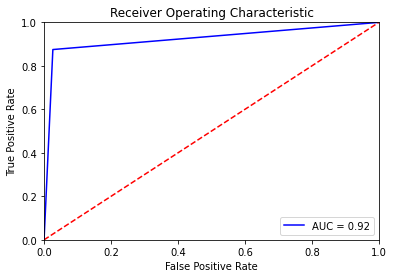

In [52]:

from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(df_novo['y'], df_novo['predito'])
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()